#                                 DATA SCIENCE IN PYTHON


# TMDB ANALYSIS

# VIJAYDITYA SARKER

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Passing Api_Key and Declaring Url for the APi

In [2]:
api_key="ed8f106adb572ac855a3ec5ce179fc62"
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key+"&language=en-US&page=1&with_genres=27"
print(url)

https://api.themoviedb.org/3/discover/movie?api_key=ed8f106adb572ac855a3ec5ce179fc62&language=en-US&page=1&with_genres=27


### Fetching Json Data from Url

In [3]:
req = requests.get(url)
json = req.json()
json

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/y5Z0WesTjvn59jP6yo459eUsbli.jpg',
   'genre_ids': [27, 53],
   'id': 663712,
   'original_language': 'en',
   'original_title': 'Terrifier 2',
   'overview': "After being resurrected by a sinister entity, Art the Clown returns to Miles County where he must hunt down and destroy a teenage girl and her younger brother on Halloween night.  As the body count rises, the siblings fight to stay alive while uncovering the true nature of Art's evil intent.",
   'popularity': 8396.618,
   'poster_path': '/b6IRp6Pl2Fsq37r9jFhGoLtaqHm.jpg',
   'release_date': '2022-10-06',
   'title': 'Terrifier 2',
   'video': False,
   'vote_average': 7.1,
   'vote_count': 370},
  {'adult': False,
   'backdrop_path': '/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg',
   'genre_ids': [27, 53],
   'id': 420634,
   'original_language': 'en',
   'original_title': 'Terrifier',
   'overview': 'On Halloween night, a young woman finds herself as the obsession of a sadisti

### Parsing Json Data

### Fetching All Keys

In [4]:
json.keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [5]:
json["results"]

[{'adult': False,
  'backdrop_path': '/y5Z0WesTjvn59jP6yo459eUsbli.jpg',
  'genre_ids': [27, 53],
  'id': 663712,
  'original_language': 'en',
  'original_title': 'Terrifier 2',
  'overview': "After being resurrected by a sinister entity, Art the Clown returns to Miles County where he must hunt down and destroy a teenage girl and her younger brother on Halloween night.  As the body count rises, the siblings fight to stay alive while uncovering the true nature of Art's evil intent.",
  'popularity': 8396.618,
  'poster_path': '/b6IRp6Pl2Fsq37r9jFhGoLtaqHm.jpg',
  'release_date': '2022-10-06',
  'title': 'Terrifier 2',
  'video': False,
  'vote_average': 7.1,
  'vote_count': 370},
 {'adult': False,
  'backdrop_path': '/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg',
  'genre_ids': [27, 53],
  'id': 420634,
  'original_language': 'en',
  'original_title': 'Terrifier',
  'overview': 'On Halloween night, a young woman finds herself as the obsession of a sadistic murderer known as Art the Clown.',
  'popu

In [6]:
Total_no_pages=json["total_pages"]
Total_no_pages

1796

## Loading dataset in an appropriate representation.
### Creating Function to fetch and save json data into Dataframe

In [7]:
def FetchAndCreateDF():
    df=pd.DataFrame()
    if Total_no_pages>=10:
        for i in range(10):
            num =i+1
            url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key+"&language=en-US&page="+str(num)+"&with_genres=27"
            req = requests.get(url)
            json = req.json()
            df1 = pd.DataFrame.from_dict(json['results'])
            df= pd.concat([df, df1])
            
    return df


In [8]:
df = FetchAndCreateDF()

# STORING MY DATA IN CSV

In [9]:
df.to_csv (r"C:\Users\vijay\OneDrive\Desktop\SEM 1\networks\DATAFRAME2.csv", index = False, header=True)

#                             DATA PRE-PROCESSING
#                                          PART - 1
## Data pre-processing, including cleaning, filtering, and transformation of the data before analysis.

In [10]:
df.shape

(200, 14)

We have Dataframe with 200 rows and 14 columns



#### removing index 

In [11]:
df.reset_index()
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,"[27, 53]",663712,en,Terrifier 2,"After being resurrected by a sinister entity, ...",8396.618,/b6IRp6Pl2Fsq37r9jFhGoLtaqHm.jpg,2022-10-06,Terrifier 2,False,7.1,370
1,False,/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg,"[27, 53]",420634,en,Terrifier,"On Halloween night, a young woman finds hersel...",3457.049,/6PQqC4SbY910VvyVad6mvsboILU.jpg,2016-10-15,Terrifier,False,6.5,838
2,False,/bJa3RcFKgtVKJqTJCSSuBQeP9c8.jpg,[27],86328,en,Terrifier,After witnessing a brutal murder on Halloween ...,2445.841,/gb6rq2nD0jRrN0dCzigg2MxXNsB.jpg,2011-08-09,Terrifier,False,6.6,39
3,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"[27, 53, 9648]",717728,en,Jeepers Creepers: Reborn,Forced to travel with her boyfriend to a horro...,1927.044,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,2022-09-15,Jeepers Creepers: Reborn,False,5.7,413
4,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"[27, 53]",760161,en,Orphan: First Kill,After escaping from an Estonian psychiatric fa...,1649.832,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,2022-07-27,Orphan: First Kill,False,6.8,1216


# checking the dimension of the data frame

In [12]:
df.shape

(200, 14)

In [13]:
df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
dtype: object

# Changing to valid data type

In [14]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [15]:
df.dtypes


adult                          bool
backdrop_path                object
genre_ids                    object
id                            int64
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
video                          bool
vote_average                float64
vote_count                    int64
dtype: object

# droping columns not required

In [16]:
df.drop('poster_path', inplace=True, axis=1)
df.drop('backdrop_path', inplace=True, axis=1)
df.drop('genre_ids', inplace=True, axis=1)
df.drop('title', inplace=True, axis=1)
df.drop('video', inplace=True, axis=1)
df.head()

,adult,id,original_language,original_title,overview,popularity,release_date,vote_average,vote_count
0,False,663712,en,Terrifier 2,"After being resurrected by a sinister entity, ...",8396.618,2022-10-06,7.1,370
1,False,420634,en,Terrifier,"On Halloween night, a young woman finds hersel...",3457.049,2016-10-15,6.5,838
2,False,86328,en,Terrifier,After witnessing a brutal murder on Halloween ...,2445.841,2011-08-09,6.6,39
3,False,717728,en,Jeepers Creepers: Reborn,Forced to travel with her boyfriend to a horro...,1927.044,2022-09-15,5.7,413
4,False,760161,en,Orphan: First Kill,After escaping from an Estonian psychiatric fa...,1649.832,2022-07-27,6.8,1216


# Rearranging the data frame 

In [17]:
cols = list(df.columns.values)
cols

['adult',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'release_date',
 'vote_average',
 'vote_count']

In [18]:
index = cols.index('vote_count')
print(index)

8


# Reordering Columns

In [19]:
order=[6,3,1,2,4,0,8,7,5]
cols=[cols[i] for i in order]
cols



['release_date',
 'original_title',
 'id',
 'original_language',
 'overview',
 'adult',
 'vote_count',
 'vote_average',
 'popularity']

In [20]:
df = df[cols]
df.head()

,release_date,original_title,id,original_language,overview,adult,vote_count,vote_average,popularity
0,2022-10-06,Terrifier 2,663712,en,"After being resurrected by a sinister entity, ...",False,370,7.1,8396.618
1,2016-10-15,Terrifier,420634,en,"On Halloween night, a young woman finds hersel...",False,838,6.5,3457.049
2,2011-08-09,Terrifier,86328,en,After witnessing a brutal murder on Halloween ...,False,39,6.6,2445.841
3,2022-09-15,Jeepers Creepers: Reborn,717728,en,Forced to travel with her boyfriend to a horro...,False,413,5.7,1927.044
4,2022-07-27,Orphan: First Kill,760161,en,After escaping from an Estonian psychiatric fa...,False,1216,6.8,1649.832


# Checking for duplicates

In [21]:
df.duplicated().sum()

0

In [22]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# Checking for Missing values


In [23]:
df.isnull().sum()


release_date         1
original_title       0
id                   0
original_language    0
overview             0
adult                0
vote_count           0
vote_average         0
popularity           0
dtype: int64

In [24]:
 df['release_date'].unique()

array(['2022-10-06T00:00:00.000000000', '2016-10-15T00:00:00.000000000',
       '2011-08-09T00:00:00.000000000', '2022-09-15T00:00:00.000000000',
       '2022-07-27T00:00:00.000000000', '2022-10-12T00:00:00.000000000',
       '2022-10-07T00:00:00.000000000', '2022-10-26T00:00:00.000000000',
       '2022-09-23T00:00:00.000000000',                           'NaT',
       '2022-09-08T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-10-10T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-10-01T00:00:00.000000000', '2022-06-22T00:00:00.000000000',
       '2022-10-14T00:00:00.000000000', '2022-09-30T00:00:00.000000000',
       '2022-02-24T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
       '2019-09-04T00:00:00.000000000', '2007-08-31T00:00:00.000000000',
       '2022-07-20T00:00:00.000000000', '2021-10-14T00:00:00.000000000',
       '2022-03-11T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000', '2022-09-25

# droping missing values

In [25]:
df.dropna(subset=['release_date'], inplace=True)

In [26]:
df.isnull().sum()

release_date         0
original_title       0
id                   0
original_language    0
overview             0
adult                0
vote_count           0
vote_average         0
popularity           0
dtype: int64

## Data characterisation, summarisation, and analysis via of the data tables and visualisations 

# Sorting My data(using popularity column) to get the top 5 movies  

In [27]:
df.sort_values(by=['popularity'], ascending=False)
TOP_MOVIES=df.head()
TOP_MOVIES

,release_date,original_title,id,original_language,overview,adult,vote_count,vote_average,popularity
0,2022-10-06,Terrifier 2,663712,en,"After being resurrected by a sinister entity, ...",False,370,7.1,8396.618
1,2016-10-15,Terrifier,420634,en,"On Halloween night, a young woman finds hersel...",False,838,6.5,3457.049
2,2011-08-09,Terrifier,86328,en,After witnessing a brutal murder on Halloween ...,False,39,6.6,2445.841
3,2022-09-15,Jeepers Creepers: Reborn,717728,en,Forced to travel with her boyfriend to a horro...,False,413,5.7,1927.044
4,2022-07-27,Orphan: First Kill,760161,en,After escaping from an Estonian psychiatric fa...,False,1216,6.8,1649.832


### Plotting Top Populated Movie

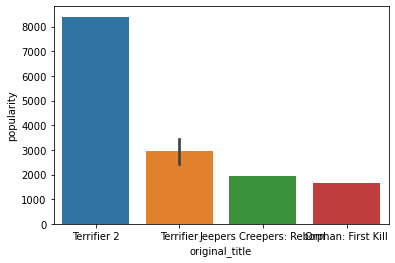

In [28]:

ax=sns.barplot(x="original_title",y="popularity",data=TOP_MOVIES)

# Sorting My data(using popularity column) to get 5 least popular  Horror movies

In [29]:
df1 = df.sort_values(by=['popularity'], ascending=True)
LEAST_POP=df1.head()
LEAST_POP

,release_date,original_title,id,original_language,overview,adult,vote_count,vote_average,popularity
19,2002-11-04,Carrie,7342,en,Carrie White is a lonely and painfully shy tee...,False,383,6.1,69.840
18,1981-09-10,The Evil Dead,764,en,When a group of college students finds a myste...,False,3131,7.3,70.005
17,2022-02-24,Studio 666,895744,en,Legendary rock band Foo Fighters move into an ...,False,125,6.2,70.201
16,1976-01-10,Salò o le 120 giornate di Sodoma,5336,it,Four corrupted fascist libertines round up 9 t...,False,1567,6.5,70.458
15,1981-10-30,Halloween II,11281,en,After failing to kill stubborn survivor Laurie...,False,1628,6.6,72.900


### Plotting Top Populated Movie

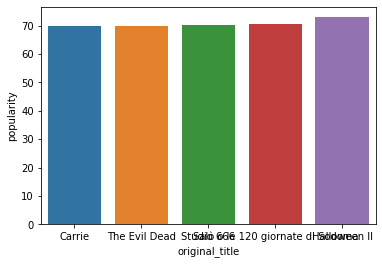

In [30]:

ax=sns.barplot(x="original_title",y="popularity",data=LEAST_POP)

# Creating column month from release_date column

In [31]:
df['month'] = df['release_date'].dt.month_name()
df.head()

,release_date,original_title,id,original_language,overview,adult,vote_count,vote_average,popularity,month
0,2022-10-06,Terrifier 2,663712,en,"After being resurrected by a sinister entity, ...",False,370,7.1,8396.618,October
1,2016-10-15,Terrifier,420634,en,"On Halloween night, a young woman finds hersel...",False,838,6.5,3457.049,October
2,2011-08-09,Terrifier,86328,en,After witnessing a brutal murder on Halloween ...,False,39,6.6,2445.841,August
3,2022-09-15,Jeepers Creepers: Reborn,717728,en,Forced to travel with her boyfriend to a horro...,False,413,5.7,1927.044,September
4,2022-07-27,Orphan: First Kill,760161,en,After escaping from an Estonian psychiatric fa...,False,1216,6.8,1649.832,July


# Reresentation of number of movies per month

In [32]:
MONTH_SUMMARY=df['month'].value_counts()
MONTH_SUMMARY

October      41
September    29
August       20
July         19
January      17
June         16
May          16
April        11
February     10
March        10
November      7
December      3
Name: month, dtype: int64

<AxesSubplot:>

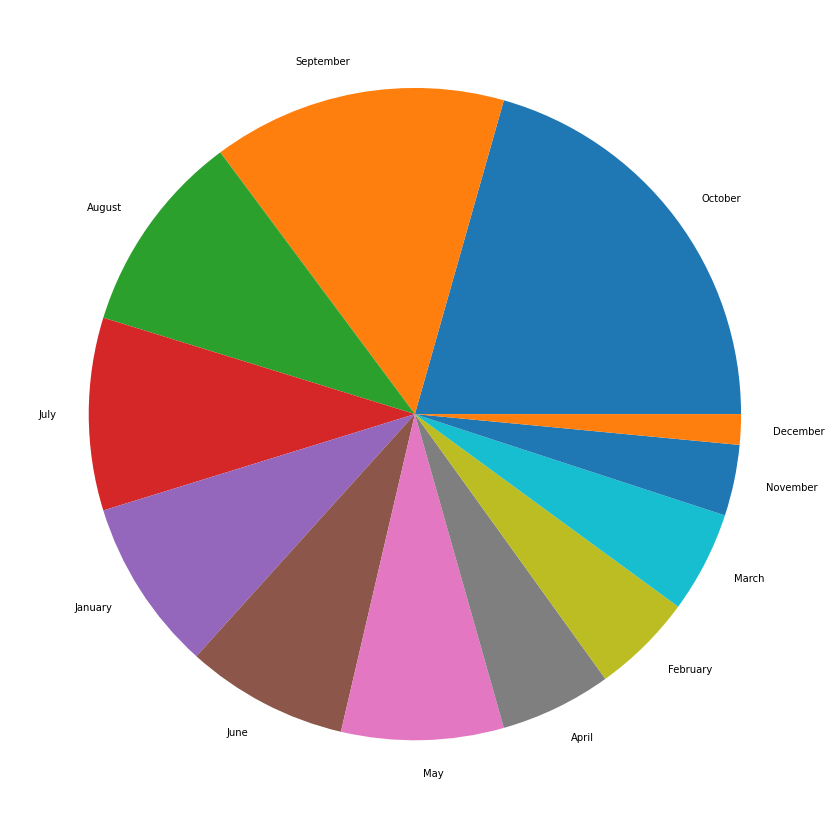

In [33]:
MONTH_SUMMARY.plot(kind="pie", label="",figsize=(15, 15))


# checking number of adult rated  movies

<AxesSubplot:>

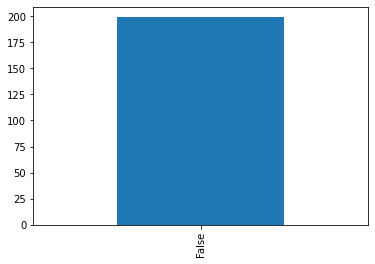

In [34]:
pd.value_counts(df['adult']).plot.bar()

### Plotting Correlation Matrix between numerical columns

In [35]:
df[['vote_count','vote_average','popularity']].corr()

,vote_count,vote_average,popularity
vote_count,1.000000,0.286293,-0.098482
vote_average,0.286293,1.000000,0.093009
popularity,-0.098482,0.093009,1.000000


<AxesSubplot:>

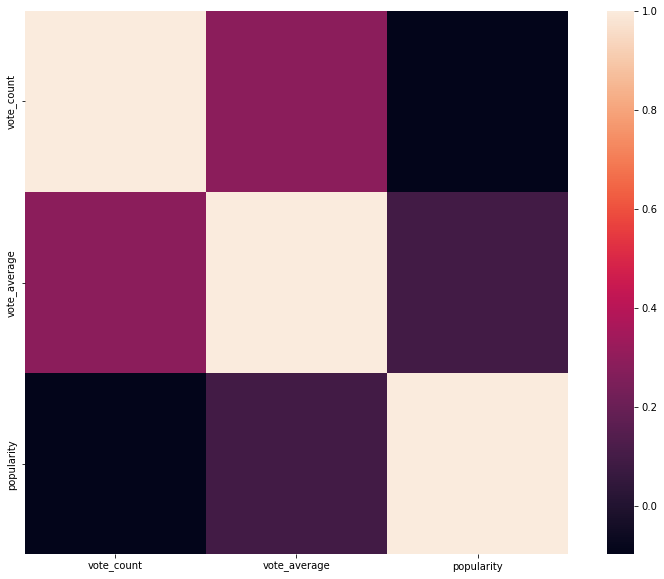

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df[['vote_count','vote_average','popularity']].corr(),square=True)

In [37]:
count_of_popularity_monthwise = df.groupby('month')['popularity'].mean()
count_of_popularity_monthwise

month
April        211.946545
August       295.810450
December     113.535000
February     151.031400
January      122.441000
July         215.223579
June         166.864688
March        174.757000
May          123.264562
November     134.650000
October      537.376488
September    299.025276
Name: popularity, dtype: float64

<AxesSubplot:xlabel='month'>

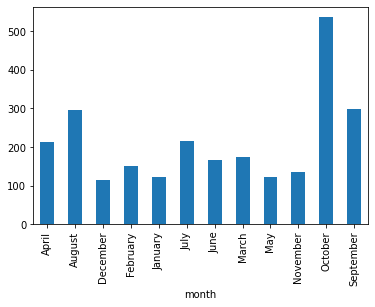

In [38]:
count_of_popularity_monthwise.plot(kind='bar')

### Calculating number votes by reviewer monthwise

In [39]:
count_of_vote_monthwise = df.groupby('month')['vote_count'].sum()
count_of_vote_monthwise

month
April         7488
August       30459
December      7235
February     13529
January      22459
July         43259
June         40781
March        15831
May          37107
November     22778
October      68017
September    46629
Name: vote_count, dtype: int64

<AxesSubplot:xlabel='month'>

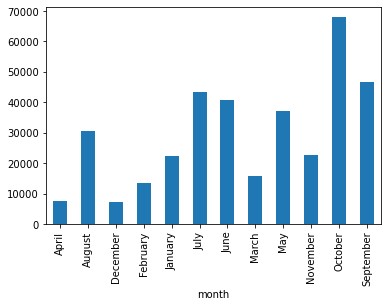

In [40]:
count_of_vote_monthwise.plot(kind='bar')

<AxesSubplot:xlabel='month'>

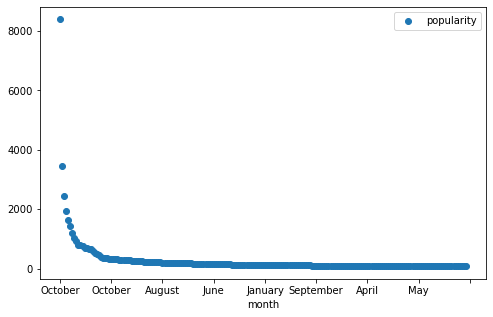

In [41]:
df.plot(x='month', y='popularity', style='o',figsize=(8, 5))

In [42]:
maximum_popularity=df["popularity"].max()
vote_avg=df["vote_average"].mean()

print("Highest Popularity = ",maximum_popularity)
print("Average Vote = ",vote_avg)

Highest Popularity =  8396.618
Average Vote =  6.164824120603015


## Interpretation and explanation of the results. Conclusions with summary of insights, challenges, and future work.

### Top 5 Popular Horror Movies

In [43]:
for i in TOP_MOVIES['original_title']:
    print(i)

Terrifier 2
Terrifier
Terrifier
Jeepers Creepers: Reborn
Orphan: First Kill


### 5 least popular Horror movies

In [44]:
for i in LEAST_POP['original_title']:
    print(i)

Carrie
The Evil Dead
Studio 666
Salò o le 120 giornate di Sodoma
Halloween II


### Most of the movies were released in the Month of the October 
#### Maybe because of Halloween

<AxesSubplot:ylabel='Monthwise Release'>

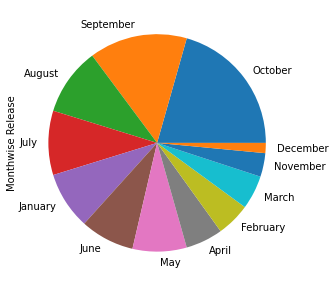

In [45]:
MONTH_SUMMARY.plot(kind="pie", label="Monthwise Release",figsize=(8, 5))

### Most Popular Movies were released in month of October

<AxesSubplot:xlabel='month'>

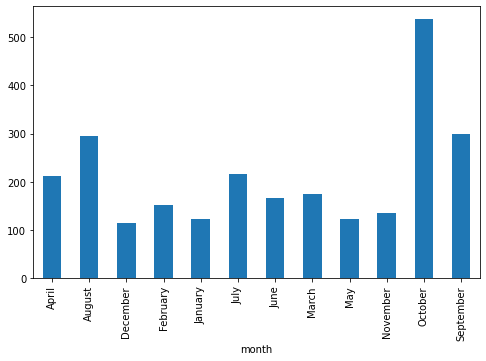

In [46]:
count_of_popularity_monthwise.plot(kind='bar',figsize=(8, 5))

### From Our inference we can conclude that :
 - Movies Released in Months of October and September are quite popular
 - We can further Analysis from dataset that Movies having Following Keywords:
     > `Terrifier`,`Reborn`, `Creepers`, `Kill` 
     are quite Popular
 - We can further Analysis from dataset that Movies having Following Keywords:
     > `Dead`,`Evil`, `Halloween` 
     are not Popular  
    

### FUTURE WORK 
#### For further Analysis from dataset we can see that Movies having objective feild have not been fully utilised,later that can be taken into account for future analysis.
#### We can also include other genres and further progress with our analysis.
